In [1]:
import warnings
warnings.filterwarnings('ignore')

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [4]:
country_data = pd.read_csv('country-data.csv')
country_data.head()

,country,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp
0,Afghanistan,90.2,10.0,7.58,44.9,1610,9.44,56.2,5.82,553
1,Albania,16.6,28.0,6.55,48.6,9930,4.49,76.3,1.65,4090
2,Algeria,27.3,38.4,4.17,31.4,12900,16.10,76.5,2.89,4460
3,Angola,119.0,62.3,2.85,42.9,5900,22.40,60.1,6.16,3530
4,Antigua and Barbuda,10.3,45.5,6.03,58.9,19100,1.44,76.8,2.13,12200


In [5]:
country_data['exports'] = country_data['exports']*country_data['gdpp']/100
country_data['health'] = country_data['health']*country_data['gdpp']/100
country_data['imports'] =country_data['imports']*country_data['gdpp']/100

In [6]:
country_data['exports'].apply(lambda x:round(x,2))
country_data['health'].apply(lambda x:round(x,2))
country_data['imports'].apply(lambda x:round(x,2))

0       248.30
1      1987.74
2      1400.44
3      1514.37
4      7185.80
        ...   
162    1565.19
163    2376.00
164    1050.62
165     450.64
166     451.14
Name: imports, Length: 167, dtype: float64

In [7]:
country_data.head()

,country,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp
0,Afghanistan,90.2,55.30,41.9174,248.297,1610,9.44,56.2,5.82,553
1,Albania,16.6,1145.20,267.8950,1987.740,9930,4.49,76.3,1.65,4090
2,Algeria,27.3,1712.64,185.9820,1400.440,12900,16.10,76.5,2.89,4460
3,Angola,119.0,2199.19,100.6050,1514.370,5900,22.40,60.1,6.16,3530
4,Antigua and Barbuda,10.3,5551.00,735.6600,7185.800,19100,1.44,76.8,2.13,12200


In [9]:
country_data.info()
country_data.shape

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 167 entries, 0 to 166
Data columns (total 10 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   country     167 non-null    object 
 1   child_mort  167 non-null    float64
 2   exports     167 non-null    float64
 3   health      167 non-null    float64
 4   imports     167 non-null    float64
 5   income      167 non-null    int64  
 6   inflation   167 non-null    float64
 7   life_expec  167 non-null    float64
 8   total_fer   167 non-null    float64
 9   gdpp        167 non-null    int64  
dtypes: float64(7), int64(2), object(1)
memory usage: 13.2+ KB


(167, 10)

In [10]:
country_data.describe()

,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp
count,167.000000,167.000000,167.000000,167.000000,167.000000,167.000000,167.000000,167.000000,167.000000
mean,38.270060,7420.618847,1056.733204,6588.352108,17144.688623,7.781832,70.555689,2.947964,12964.155689
std,40.328931,17973.885795,1801.408906,14710.810418,19278.067698,10.570704,8.893172,1.513848,18328.704809
min,2.600000,1.076920,12.821200,0.651092,609.000000,-4.210000,32.100000,1.150000,231.000000
25%,8.250000,447.140000,78.535500,640.215000,3355.000000,1.810000,65.300000,1.795000,1330.000000
50%,19.300000,1777.440000,321.886000,2045.580000,9960.000000,5.390000,73.100000,2.410000,4660.000000
75%,62.100000,7278.000000,976.940000,7719.600000,22800.000000,10.750000,76.800000,3.880000,14050.000000
max,208.000000,183750.000000,8663.600000,149100.000000,125000.000000,104.000000,82.800000,7.490000,105000.000000


In [14]:
country_data.isnull().sum()


,country
count,167
unique,167
top,Afghanistan
freq,1


In [15]:
country_data.describe(include='object')

,country
count,167
unique,167
top,Afghanistan
freq,1


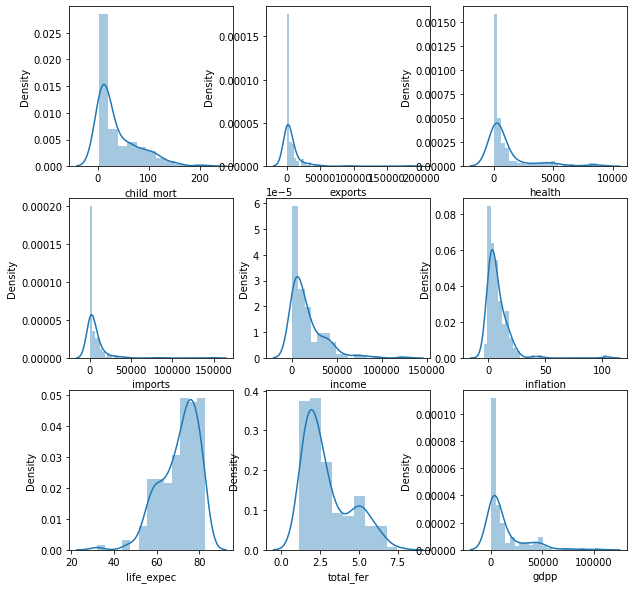

In [18]:
plt.figure(figsize=(10,10))
feature = country_data.columns[1:10]
for i in enumerate(feature):
    plt.subplot(3,3,i[0]+1)
    sns.distplot(country_data[i[1]])

Text(0.5, 1.0, 'Highest child Mortality counries')

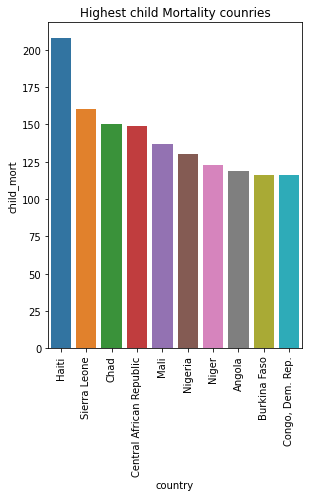

In [27]:
plt.figure(figsize=(10,6))
plt.subplot(1,2,1)
top10_child_mort = country_data[['country','child_mort']].sort_values('child_mort',ascending=False).head(10)
sns.barplot(x='country',y='child_mort',data=top10_child_mort)
plt.xticks(rotation=90)
plt.title('Highest child Mortality counries')


Text(0.5, 1.0, 'High GDPP Country')

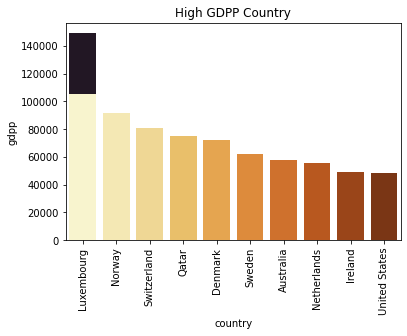

In [29]:

Top10_gdpp = country_data[['country','gdpp']].sort_values('gdpp', ascending=False).head(10)
sns.barplot(x='country',y='gdpp',data=Top10_gdpp,palette='YlOrBr')
plt.xticks(rotation=90)
plt.title('High GDPP Country')

(array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9]),
 [Text(0, 0, 'United States'),
  Text(1, 0, 'Switzerland'),
  Text(2, 0, 'Norway'),
  Text(3, 0, 'Luxembourg'),
  Text(4, 0, 'Denmark'),
  Text(5, 0, 'Netherlands'),
  Text(6, 0, 'Canada'),
  Text(7, 0, 'Austria'),
  Text(8, 0, 'Sweden'),
  Text(9, 0, 'Germany')])

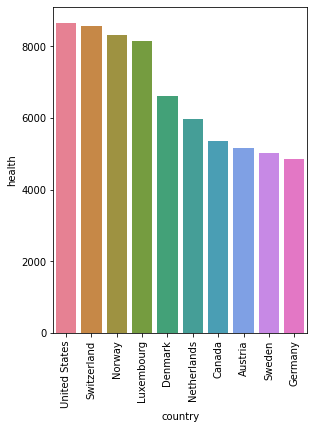

In [30]:
plt.figure(figsize=(10,6))
plt.subplot(1,2,1)

Top10_health = country_data[['country','health']].sort_values('health', ascending=False).head(10)
sns.barplot(x='country',y='health',data=Top10_health,palette='husl')
plt.xticks(rotation=90)

Text(0.5, 1.0, 'High Income Country')

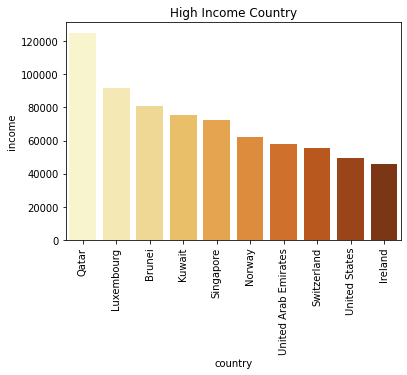

In [31]:

Top10_income = country_data[['country','income']].sort_values('income', ascending=False).head(10)
sns.barplot(x='country',y='income',data=Top10_income,palette='YlOrBr')
plt.xticks(rotation=90)
plt.title('High Income Country')


Text(0.5, 1.0, 'High Import Country')

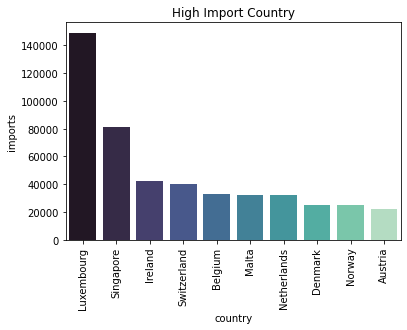

In [32]:
Top10_import = country_data[['country','imports']].sort_values('imports', ascending=False).head(10)
sns.barplot(x='country',y='imports',data=Top10_import,palette='mako')
plt.xticks(rotation=90)
plt.title('High Import Country')

Text(0.5, 1.0, 'High Export Country')

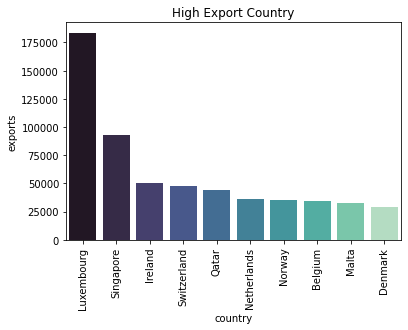

In [33]:
Top10_export = country_data[['country','exports']].sort_values('exports', ascending=False).head(10)
sns.barplot(x='country',y='exports',data=Top10_export,palette='mako')
plt.xticks(rotation=90)
plt.title('High Export Country')


Text(0.5, 1.0, 'Low Income Country')

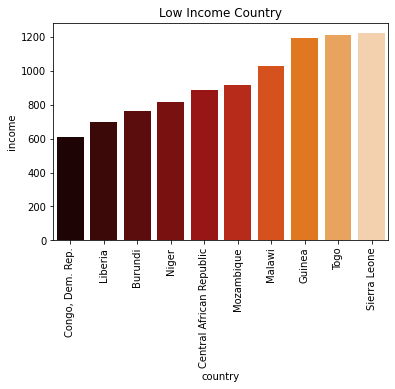

In [34]:
Bottom10_income = country_data[['country','income']].sort_values('income', ascending=True).head(10)
sns.barplot(x='country',y='income',data=Bottom10_income,palette='gist_heat')
plt.xticks(rotation=90)
plt.title('Low Income Country')


Text(0.5, 1.0, 'Lowest child Mortality counries')

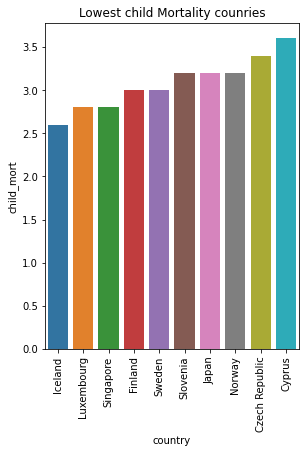

In [36]:
plt.figure(figsize=(10,6))
plt.subplot(1,2,2)
bottom10_child_mort = country_data[['country','child_mort']].sort_values('child_mort',ascending=True).head(10)
sns.barplot(x='country',y='child_mort',data=bottom10_child_mort)
plt.xticks(rotation=90)
plt.title('Lowest child Mortality counries')

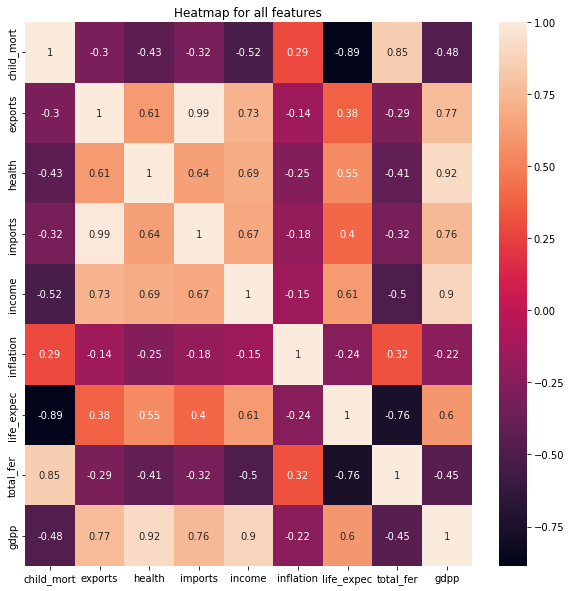

In [38]:
plt.figure(figsize=(10,10))
sns.heatmap(country_data.corr(),annot=True)
plt.title('Heatmap for all features')
plt.show()

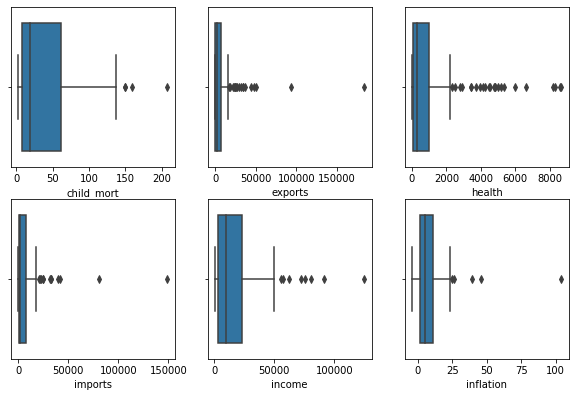

In [42]:
plt.figure(figsize=(10,10))

features = country_data.columns[1:7]
for i in enumerate(features):
    plt.subplot(3,3,i[0]+1)
    sns.boxplot(country_data[i[1]])

In [45]:
def z_score(values):
    mean = np.mean(values)
    std = np.std(values)
    z_scores = [(x - mean) / std for x in values]
    return z_scores
z_custom = np.array([z_score(country_data['child_mort'])])
np.abs(z_custom)

array([[1.29153238, 0.5389489 , 0.27283273, 2.00780766, 0.69563412,
        0.5911773 , 0.50164289, 0.8324228 , 0.84485813, 0.02312823,
        0.60858677, 0.73791425, 0.27680906, 0.5986385 , 0.81501333,
        0.839884  , 0.48423342, 1.8088423 , 0.11017558, 0.20717119,
        0.78019439, 0.35390814, 0.45936275, 0.69065998, 0.68319878,
        1.93319565, 1.37609265, 0.15245571, 1.73423029, 0.81252626,
        0.29272927, 2.75392774, 2.77879841, 0.73542719, 0.5613325 ,
        0.48920756, 1.24179104, 1.93319565, 0.63743377, 0.69812118,
        1.8088423 , 0.81501333, 0.8622676 , 0.86724173, 0.84983227,
        0.09625098, 0.32754821, 0.22806553, 0.47428516, 1.8088423 ,
        0.42105895, 0.839884  , 0.35241888, 0.87719   , 0.8473452 ,
        0.63245964, 1.04531275, 0.54143596, 0.8473452 , 0.906037  ,
        0.8548064 , 0.58869024, 0.07138031, 1.75910096, 1.88345431,
        0.01666484, 4.22129724, 0.80257799, 0.88713827, 0.51059336,
        0.12360872, 0.47179809, 0.03407431, 0.84

In [85]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
Xsc = sc.fit_transform(country_data)

In [86]:
dfsc = pd.DataFrame(Xsc, columns=country_data.columns)
dfsc.head(2)

,0,1,2,3,4,5,6,7,8
0,1.291532,-0.411011,-0.565040,-0.432276,-0.808245,0.157336,-1.619092,1.902882,-0.679180
1,-0.538949,-0.350191,-0.439218,-0.313677,-0.375369,-0.312347,0.647866,-0.859973,-0.485623


In [87]:
from sklearn.decomposition import PCA

pca = PCA()
pcadf = pca.fit_transform(Xsc)

In [88]:
pcadf = pd.DataFrame(pcadf, columns=['PC'+str(i) for i in range(1,pcadf.shape[1]+1)])
pcadf.head(2)

,PC1,PC2,PC3,PC4,PC5,PC6,PC7,PC8,PC9
0,-2.635575,1.472267,-0.549489,-0.242326,0.023530,-0.295663,-0.402107,0.015225,0.021453
1,-0.024206,-1.429892,-0.014123,0.450645,-0.125821,0.059231,0.262750,0.000376,-0.033883


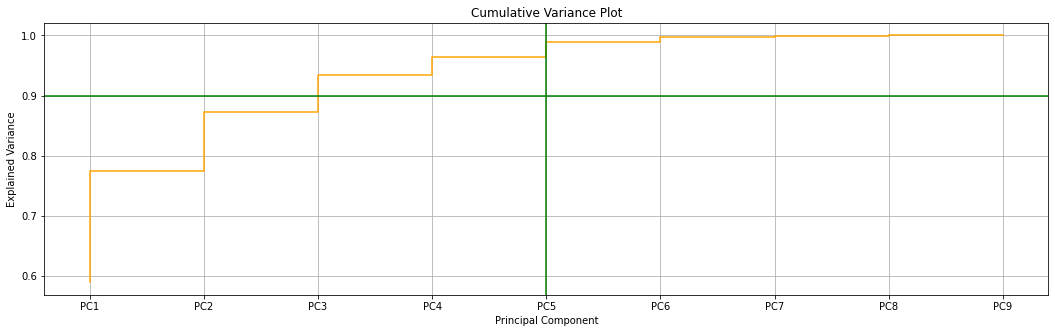

In [89]:
plt.figure(figsize=(18,5))
sns.lineplot(x=pcadf.columns, y=np.cumsum(pca.explained_variance_ratio_),drawstyle='steps-pre',color='orange')
plt.axhline(0.90,color='green')
plt.axvline(4, color='green')
plt.title('Cumulative Variance Plot')
plt.xlabel('Principal Component')
plt.ylabel('Explained Variance')
plt.grid()
plt.show()

In [58]:
pca = PCA(n_components=5)
pcadf = pca.fit_transform(Xsc)

In [90]:
pcadf = pd.DataFrame(pcadf, columns=['PC'+str(i) for i in range(1,pcadf.shape[1]+1)])
pcadf.head(2)

,PC1,PC2,PC3,PC4,PC5,PC6,PC7,PC8,PC9
0,-2.635575,1.472267,-0.549489,-0.242326,0.023530,-0.295663,-0.402107,0.015225,0.021453
1,-0.024206,-1.429892,-0.014123,0.450645,-0.125821,0.059231,0.262750,0.000376,-0.033883


ValueError: num must be 1 <= num <= 6, not 7

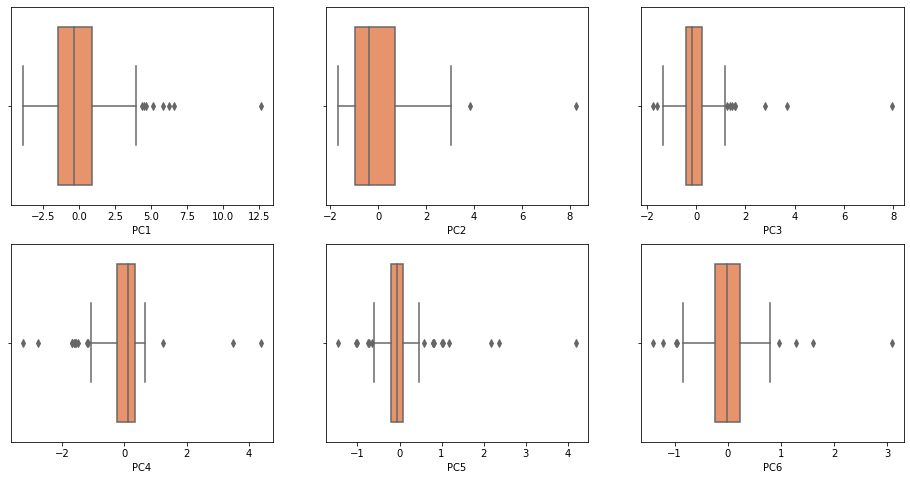

In [91]:
plt.figure(figsize=(16,8))
i = 1
for pc in pcadf.columns:
    plt.subplot(2,3,i)
    sns.boxplot(x=pcadf[pc],palette='OrRd')
    i += 1
plt.suptitle('Outliers in the given components', color='red')
plt.show()

In [92]:
for pc in pcadf:
    q1,q3,q10,q90 = pcadf[pc].quantile([0.25,0.75,0.1,0.90])
    iqr = q3-q1
    ul = q3 + 1.5*iqr
    ll = q1 - 1.5*iqr
    pcadf[pc] = pcadf[pc].apply(lambda x: q10 if x<ll else q90 if x>ul else x)

ValueError: num must be 1 <= num <= 6, not 7

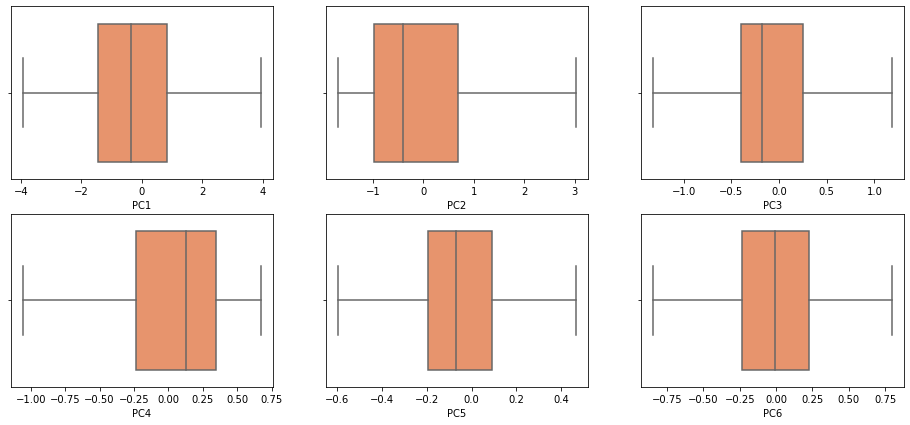

In [95]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
country_data = scaler.fit_transform(country_data)

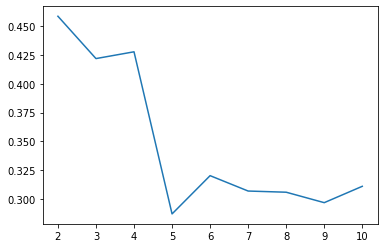

In [96]:
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
ss = []
for k in range(2,11):
    kmeans = KMeans(n_clusters=k).fit(country_data)
    ss.append([k,silhouette_score(country_data,kmeans.labels_)])
temp = pd.DataFrame(ss)
plt.plot(temp[0],temp[1])

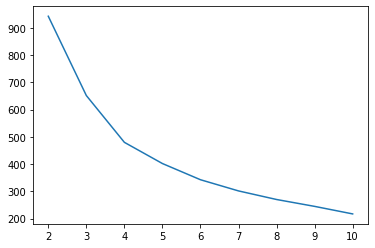

In [97]:
ssd = []
for k in range(2,11):
    kmean = KMeans(n_clusters=k).fit(country_data)
    ssd.append([k,kmean.inertia_])
temp = pd.DataFrame(ssd)
plt.plot(temp[0],temp[1])

In [100]:
range_n_cluster = [2,3,4,5,6,7,8]

for num_clusters in range_n_cluster:

    kmeans = KMeans(n_clusters=num_clusters, max_iter=50)
    kmeans.fit(country_data)
    
    cluster_labels = kmeans.labels_
    
    silhouette_avg = silhouette_score(country_data,cluster_labels)
    print("For n_clusters={0}, the silhouette score is {1}".format(num_clusters,silhouette_avg))

For n_clusters=2, the silhouette score is 0.45863306035476253
For n_clusters=3, the silhouette score is 0.4218615812599681
For n_clusters=4, the silhouette score is 0.4277518271600435
For n_clusters=5, the silhouette score is 0.43077513396770467
For n_clusters=6, the silhouette score is 0.3927936961757552
For n_clusters=7, the silhouette score is 0.289458502523007
For n_clusters=8, the silhouette score is 0.273856423836257
